In [1]:
%load_ext autoreload
%autoreload complete

In [2]:
import numpy as np
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import data_accessor as acc
datas = [
    'temperature_230509_discrete',
    'pressure_230516_discrete'
    ]
data_dictionary = acc.setup(datas)

loading temperature_230509_discrete__________________________
	input shape (number, dimension): (6000, 10000)
	label shape (number, dimension): (6000, 1)
	there are 16 folds
	4200 for training, 600 for validating, 1200 for testing
loading pressure_230516_discrete__________________________
	input shape (number, dimension): (5000, 10000)
	label shape (number, dimension): (5000, 1)
	there are 16 folds
	3500 for training, 500 for validating, 1000 for testing


__________CROSS VALIDATION__________
Cross-validation rounds: 16
Epochs: 1000
Datas to learn: 
	0: temperature_230509_discrete
	1: pressure_230516_discrete
SINGLE TASK____________________________
we're learning: pressure_230516_discrete
>round 0
EARLY STOPPING @ epoch 31
min train loss: 0.00010732266528066248
min valid loss: 8.291347558042617e-05


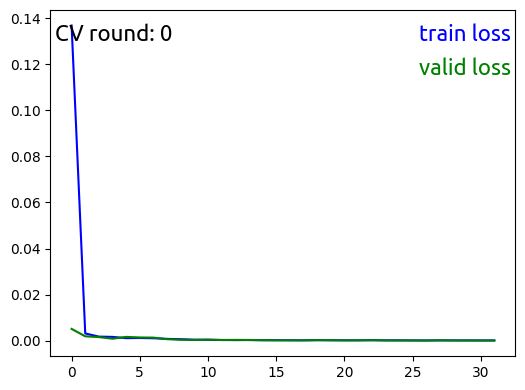

>round 1
EARLY STOPPING @ epoch 37
min train loss: 6.828425281458873e-05
min valid loss: 7.081206467773882e-05


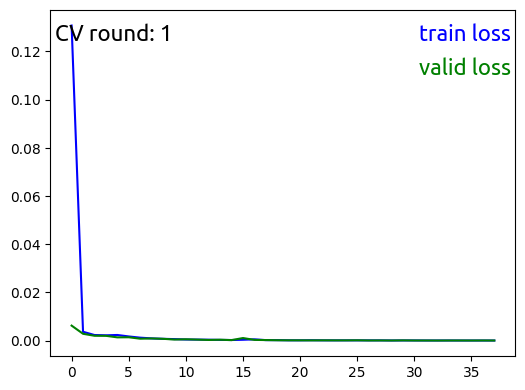

>round 2
EARLY STOPPING @ epoch 26
min train loss: 0.000141338434133848
min valid loss: 0.00012867022451246157


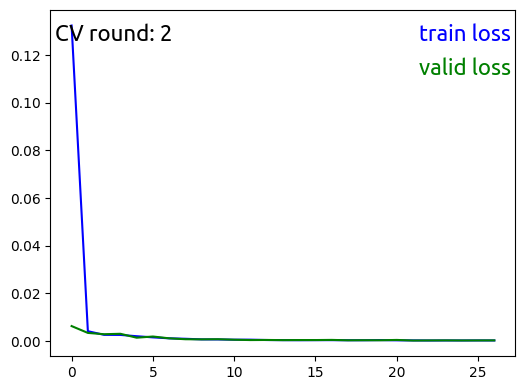

>round 3
EARLY STOPPING @ epoch 23
min train loss: 0.00011818883927348493
min valid loss: 0.0001297077142226044


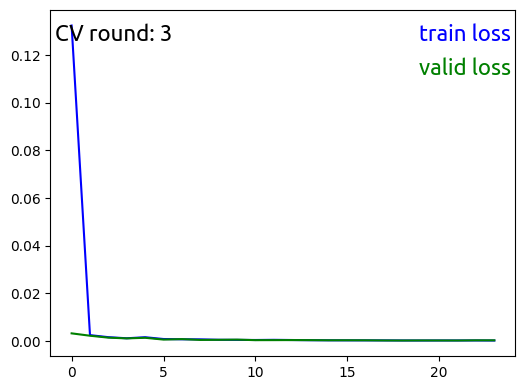

>round 4
EARLY STOPPING @ epoch 28
min train loss: 0.00010318648948503489
min valid loss: 9.936702008417342e-05


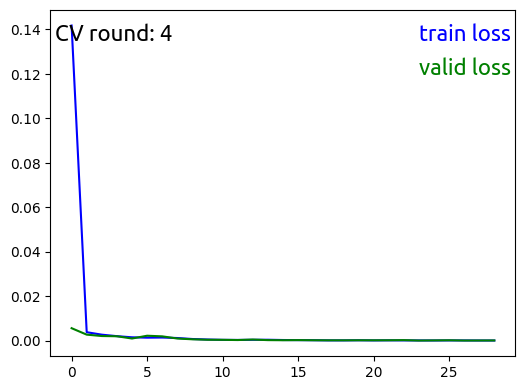

>round 5
EARLY STOPPING @ epoch 40
min train loss: 8.189285521935248e-05
min valid loss: 6.440142169594765e-05


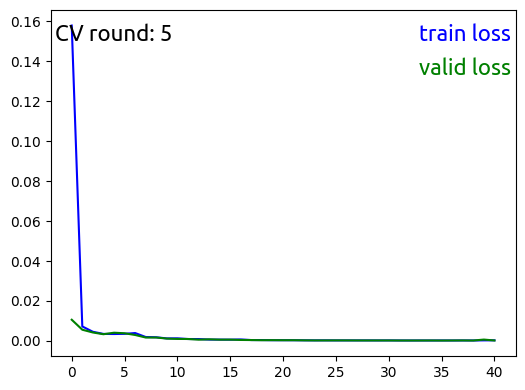

>round 6
EARLY STOPPING @ epoch 41
min train loss: 6.756231212586334e-05
min valid loss: 5.930987435931456e-05


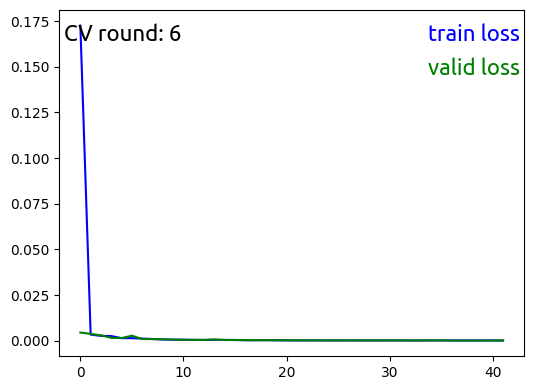

>round 7
EARLY STOPPING @ epoch 48
min train loss: 6.406960571687457e-05
min valid loss: 7.41484395803127e-05


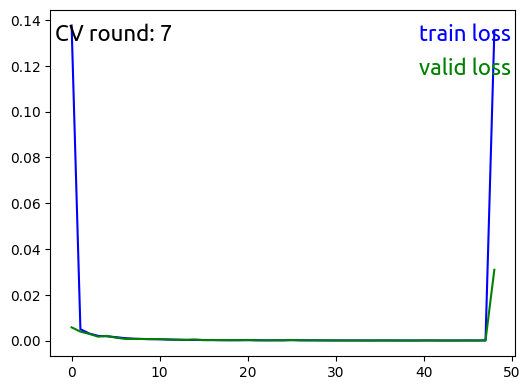

>round 8
EARLY STOPPING @ epoch 39
min train loss: 8.576993548724038e-05
min valid loss: 7.764071597193833e-05


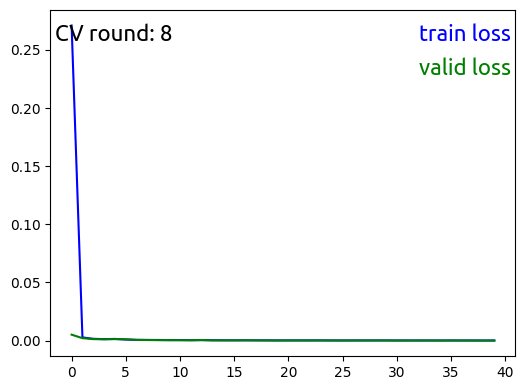

>round 9
EARLY STOPPING @ epoch 27
min train loss: 0.0001281296912400814
min valid loss: 9.196415976475691e-05


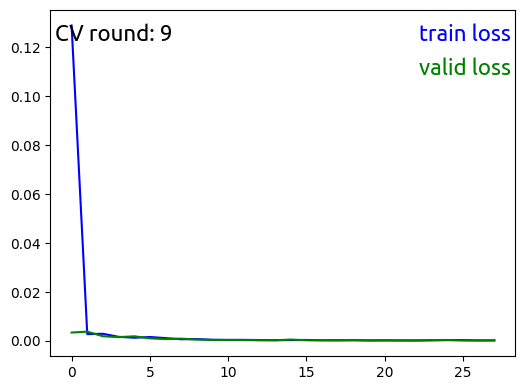

>round 10
EARLY STOPPING @ epoch 41
min train loss: 7.27567637196361e-05
min valid loss: 7.386325978586683e-05


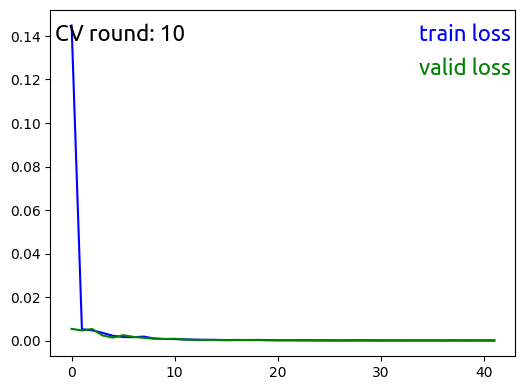

>round 11
EARLY STOPPING @ epoch 41
min train loss: 0.00010453669138686646
min valid loss: 8.610172062617494e-05


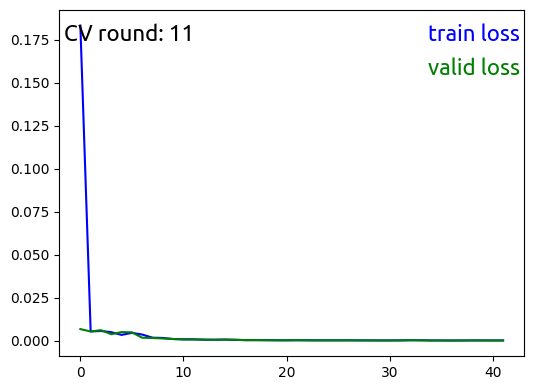

>round 12
EARLY STOPPING @ epoch 26
min train loss: 0.00010305915764712898
min valid loss: 0.00013078648498776602


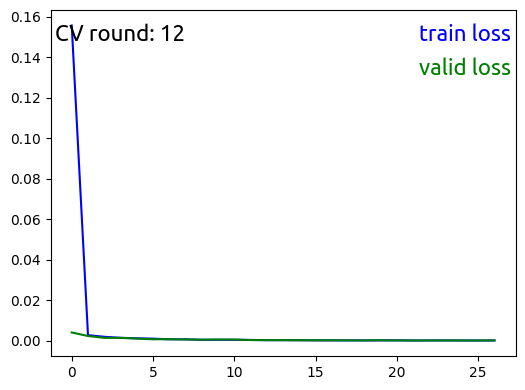

>round 13
EARLY STOPPING @ epoch 33
min train loss: 7.538914737365716e-05
min valid loss: 7.715549691056367e-05


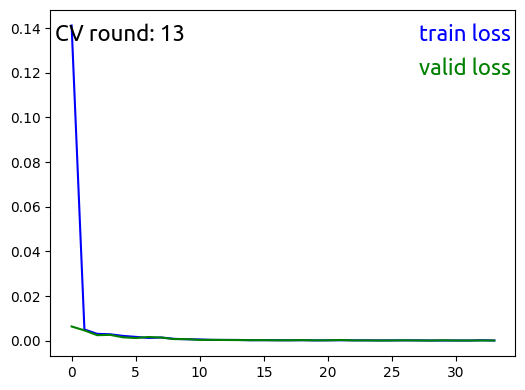

>round 14
EARLY STOPPING @ epoch 25
min train loss: 0.000122413751589854
min valid loss: 0.00013523505276680226


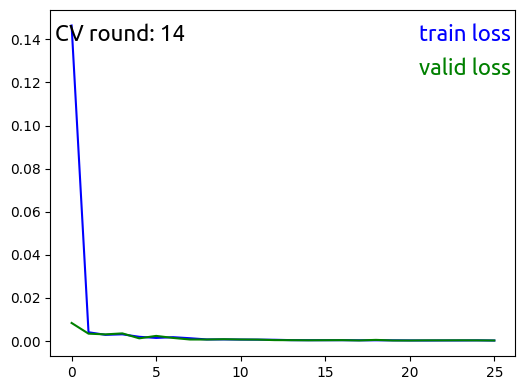

>round 15
EARLY STOPPING @ epoch 28
min train loss: 9.672168849978003e-05
min valid loss: 8.809095197648276e-05


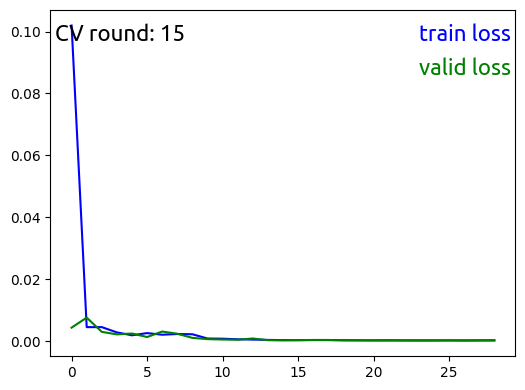

BEST model: CV=6.pth with 5.930987435931456e-05
trained on pressure_230516_discrete
Aggregate performance: Valid loss mean 9.188550484395819e-05, std 2.4597205627869612e-05
😇 TRAINing COMPLETE____________________________
TEST____________________________
Testing temperature_230509_discrete, loss:  0.3225208144438894
Testing pressure_230516_discrete, loss:  8.135217217386526e-05


In [3]:
from CrossValidation import CrossValidator
from tools import SaveBestCrossValidationModel
from Triplet_TCN import TripletAux_and_TCNDataset, TripletAux_and_TCNManager
from data import alternate_rows_itertools
s = {
    'problem'           : "regression",
    'approach'          : "metric learning/non-parametric",
    'algorithm'         : "triplet network",
    'input'             : "samples from a distribution",
    'input type'        : "vectors",
    'input meaning'     : "spectrum", 
    'input dimension'   : 10000,
    'input channels'    : 1,
    'output'            : "samples from a distribution",
    'output type'       : "one number",
    'output meaning'    : "temperature or pressure, depending on distribution",
    'output dimension'  : 1,
    'learning rate'     : 1e-4, # was 1e-4
    'feature dimension' : 300,
    'cross validation round': 16,
    'cross validation round-development' : 2,
    'epoch'             : 1000,
    'epoch-development' : 20,
    'batch size'        : 64,
    'number of convolution levels': 3,
    'best model folder' : 'triplet_best_model/'
}
# datas.reverse()
CVtor = CrossValidator(saver=SaveBestCrossValidationModel(s['best model folder']), 
                       dataset=TripletAux_and_TCNDataset,
                       datas=datas,
                       data_dictionary=data_dictionary,
                       manager=TripletAux_and_TCNManager,
                       settings=s,
                       device=device,
                       dev=False)
CVtor.single_task_train(1)
# CVtor.multi_task_train_sequential()
# CVtor.multi_task_train_weave(alternate_rows_itertools) 
CVtor.complete_notify()
CVtor.test_all()